# Tutorial 1 - Geometry

In this tutorial we explore how simulated *geometries* can be defined and initial magnetisation states specified. The package we use to define finite difference meshes and fields is `discretisedfield`.

In [1]:
import discretisedfield as df
%matplotlib inline

## Defining the geometry

Let us say that we need to define a nanocube mesh with edge length $L=100\,\text{nm}$ and discretisation cell $(d, d, d)$, with $d=10 \,\text{nm}$. For that we need to define two points $p_{1}$ and $p_{2}$ between which the mesh spans and provide them (together with the discretisation cell) to the `Mesh` class:

In [2]:
L = 100e-9  # edge length (m)
d = 10e-9  # cell size (m)

p1 = (0, 0, 0)  # first point of cuboid containing simulation geometry
p2 = (L, L, L)  # second point
cell = (d, d, d)  # discretisation cell

mesh = df.Mesh(p1=p1, p2=p2, cell=cell)  # mesh definition

We can then inspect some basic parameters of the mesh:

- Edge length:

In [3]:
mesh.l  # edge length

(1e-07, 1e-07, 1e-07)

- Number of discretisation cells in all three directions:

In [4]:
mesh.n  # number of cells 

(10, 10, 10)

- Minimum mesh domain coordinate:

In [5]:
mesh.pmin  # minimum mesh domain coordinate

(0, 0, 0)

- Maximum mesh domain coordinate:

In [6]:
mesh.pmax  # maximum mesh domain coordinate

(1e-07, 1e-07, 1e-07)

Or we can visualise the mesh domain and a discretisation cell:

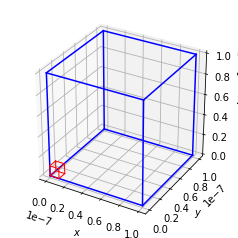

In [7]:
mesh

## Defining a field on a geometry

After we defined a mesh, we can define different finite difference fields. For that, we use `Field` class. We need to provide the mesh, dimension of the data values, and the value of the field. Let us define a 3d-vector field (`dim=3`) that is uniform in the $(1, 0, 0)$ direction.

In [8]:
m = df.Field(mesh, dim=3, value=(1, 0, 0))

A simple slice visualisation of the mesh in the $z$ direction at $L/2$ is:

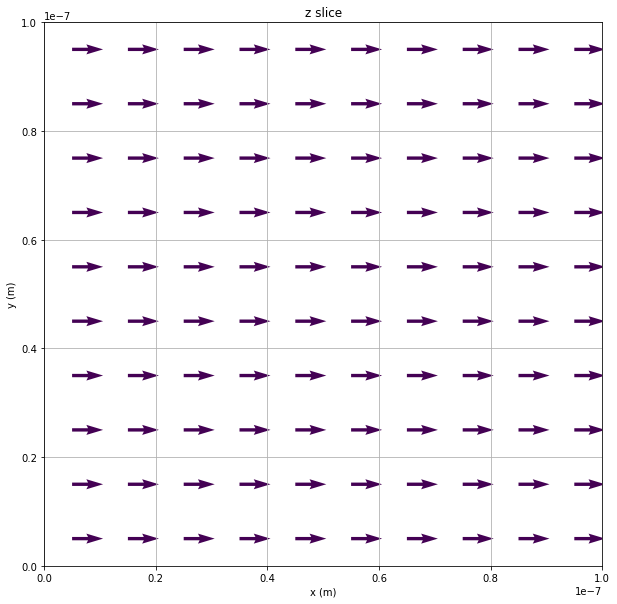

In [9]:
m.plot_slice("z", L/2);

# Spatially varying field

When we defined a uniform vector field, we used a tuple `(1, 0, 0)` to define its value. However, we can also provide a Python function if we want to define a non-uniform field. This function takes the position in the mesh as input, and returns a value that the field should have at that point:

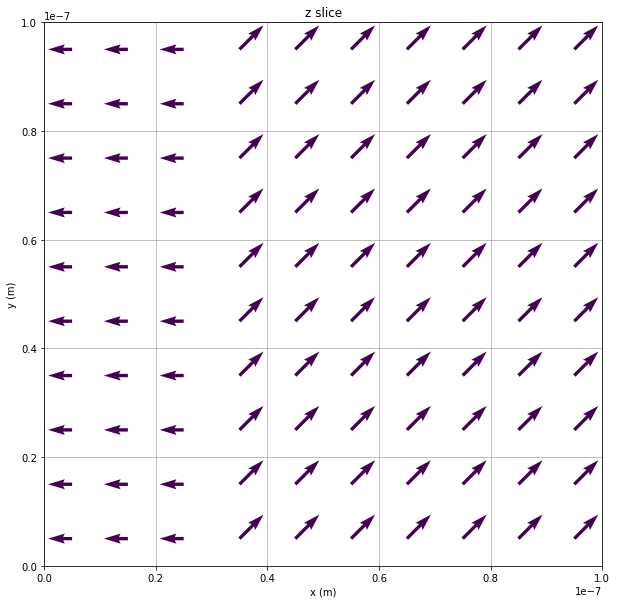

In [10]:
def m_value(pos):
    x, y, z = pos  # unpack position into individual components
    if x > L/4:
        return (1, 1, 0)
    else:
        return (-1, 0, 0)
    
m = df.Field(mesh, dim=3, value=m_value)

m.plot_slice("z", L/2);

The field object can be treated as a mathematical function - if we pass a position tuple to the function, it will return the vector value of the field at that location:

In [11]:
point = (0, 0, 0)
m(point)

(-1.0, 0.0, 0.0)

In [12]:
m([90e-9, 0, 0])

(1.0, 1.0, 0.0)

In micromagnetics, the saturation magnetisation $M_\mathrm{s}$ is typically constant (at least for each position). The `Field` constructor accepts an additional parameter `norm` which we can use for that:

In [13]:
Ms = 8e6  # saturation magnetisation (A/m)
m = df.Field(mesh, dim=3, value=m_value, norm=Ms)

m([0, 0, 0])

(-8000000.0, 0.0, 0.0)

## Spatially varying norm $M_\mathrm{s}$

By defining different norms, we can specify different geometries, so that $M_\text{s}=0$ outside the mesh. For instance, let us assume we want to define a sphere of radius $L/2$ and magnetise it in the negative $y$ direction.

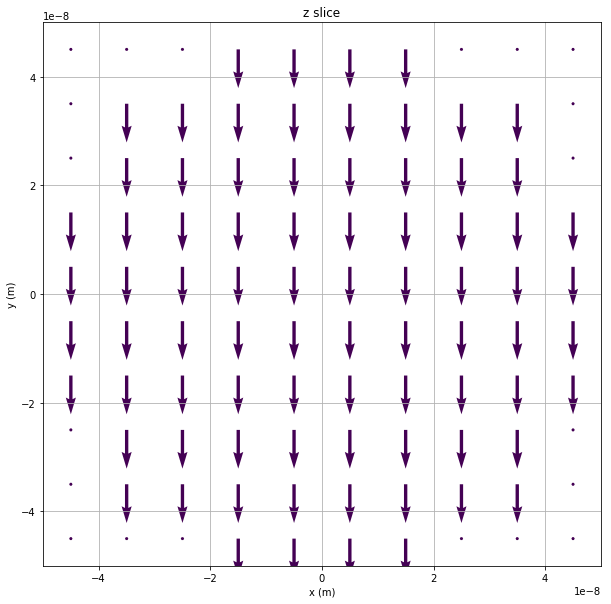

In [14]:
mesh = df.Mesh(p1=(-L/2, -L/2, -L/2), p2=(L/2, L/2, L/2), cell=(d, d, d))

def Ms_value(pos):
    x, y, z = pos
    if (x**2 + y**2 + z**2)**0.5 < L/2:
        return Ms
    else:
        return 0

m = df.Field(mesh, dim=3, value=(0, -1, 0), norm=Ms_value)

m.plot_slice("z", 0);

### Exercise 1a

The code below defines as thin film (thickness $t$) in the x-y plane. Extend the code in the following cell so that the magnetisation $M_\mathrm{s}$ is $10^7\mathrm{A/m}$ in a disk of thickness $t = 10 \,\text{nm}$ and diameter $d = 120 \,\text{nm}$. The disk is centred around the origin (0, 0, 0).  The magnetisation should be $\mathbf{m} = (1, 0, 0)$.


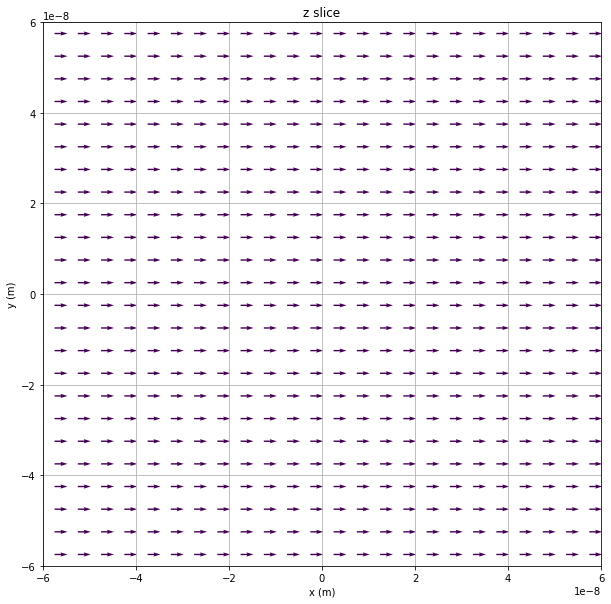

In [15]:
t = 10e-9  # thickness (m)
d = 120e-9  # diameter (m)
cell = (5e-9, 5e-9, 5e-9)  # discretisation cell size (m)
Ms = 1e7  # saturation magnetisation (A/m)

mesh = df.Mesh(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, t), cell=cell)

def Ms_value(pos):
    x, y, z = pos
    # insert missing code here
    return Ms
   
m = df.Field(mesh, value=(1, 0, 0), norm=Ms_value)

m.plot_slice("z", 0);

## Exercise 1b

Extend the previous example in the next cell so that the magnetisation is:

$$\mathbf{m} = \begin{cases} (-1, 0, 0) & \text{for } y \le 0 \\ (1, 0, 0) & \text{for } y > 0 \end{cases}$$

with saturation magnetisation $10^{7} \,\text{A}\,\text{m}^{-1}$.

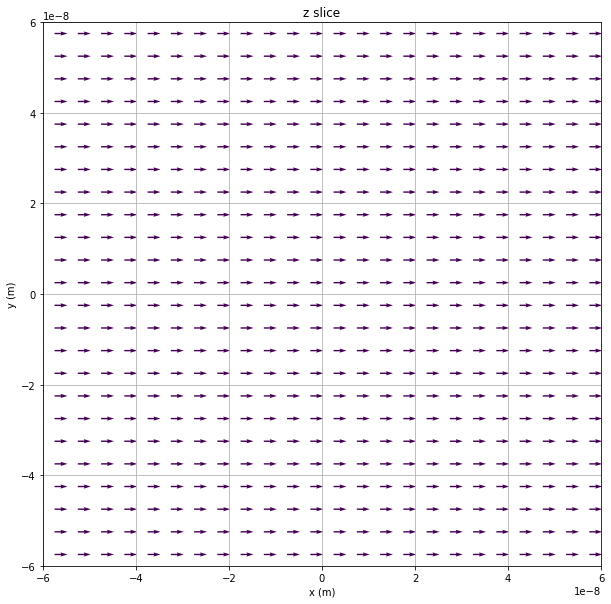

In [16]:
t = 10e-9  # thickness (m)
d = 120e-9  # diameter (m)
cell = (5e-9, 5e-9, 5e-9)  # discretisation cell size (m)
Ms = 1e7  # saturation magnetisation (A/m)

mesh = df.Mesh(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, t), cell=cell)

def Ms_value(pos):
    x, y, z = pos
    # Copy code from exercise 1a.
    return Ms
    
def m_value(pos):
    x, y, z = pos
    # Insert missing code here to get the right magnetisation.
    return (1, 0, 0)
    
m = df.Field(mesh, value=m_value, norm=Ms_value)

m.plot_slice("z", 0);

## Exercise 2

Extend the code sample provided below to define the following geometry with $10\,\text{nm}$ thickness:

   <img src="geometry_exercise2.png",width=400>

The magnetisation saturation is $8 \times 10^{6} \,\text{A}\,\text{m}^{-1}$ and the magnetisation direction is as shown in the figure.

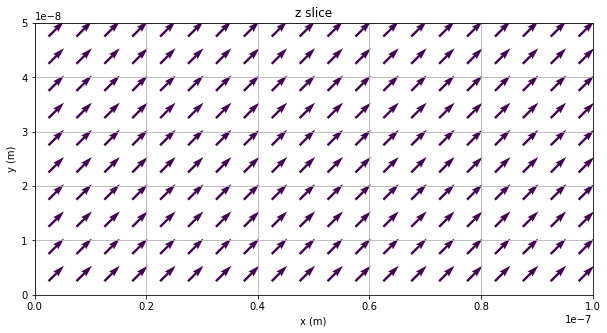

In [17]:
cell = (5e-9, 5e-9, 5e-9)  # discretisation cell size (m)
Ms = 8e6  # saturation magnetisation (A/m)

mesh = df.Mesh(p1=(0, 0, 0), p2=(100e-9, 50e-9, 10e-9), cell=cell)

def Ms_value(pos):
    x, y, z = pos
    # Insert missing code here to get the right shape of geometry.
    return Ms
    
def m_value(pos):
    x, y, z = pos
    # Insert missing code here.
    return (1, 1, 1)
    
m = df.Field(mesh, value=m_value, norm=Ms_value)

m.plot_slice("z", 0);